In [2]:
import numpy as np
import pandas as pd
import pickle


dfbooks = pd.read_pickle("data.pkl")

import torch


In [46]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

# !pip install contractions
import contractions

In [73]:
# dfbooks['review_body'] = dfbooks['review_body'].str.replace('\d+', '') #Replace all occurring digits in the strings with nothing

# dfbooks['review_body']=dfbooks['review_body'].apply(str)

dfbooks

,product_id,product_parent,product_title,review_body,star_rating,review_date,discipline
5,0262181533,598678717,psychology proof deductive reasoning human thi...,Review based on a cursory examination by Unive...,4,2005-10-14,psychology
46,1594200459,697870179,end poverty economic possibilities time,ALthough he is correct that the IMF and World ...,3,2005-10-14,economy
86,0742538168,339619920,attack messenger politicians turn media americ...,While I don't always agree with his TV analysi...,2,2005-10-14,politics
138,0262612089,733918058,coming generational storm need know americas e...,Since the 1992 presidential run of H. Ross Per...,4,2005-10-14,economy
205,0521832357,82232603,c design patterns derivatives pricing mathemat...,In terms of programming concepts and OOP desig...,5,2005-10-14,economy
...,...,...,...,...,...,...,...
3104923,0679448594,218513537,primary colors novel politics,This book captures the reality of the American...,5,1996-05-19,politics
3105019,0345340280,426467516,living past lives psychology past life regression,"Based on anecdotal evidence, intuition, tradit...",5,1996-05-15,psychology
3105230,0691077304,232298383,open borders nonalignment political evolution ...,An excellent monograph by an outstanding scholar,5,1995-11-19,politics
3105313,0393310353,323732312,thinking strategically competitive edge busine...,The authors write with clarity in a field whic...,4,1995-09-14,politics


In [44]:
import re
import string
from gensim.parsing.preprocessing import remove_stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup

stop=set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')


def clean_text(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r"n\'t","not",text)
    text = re.sub(r"\'re","are",text)
    text = re.sub(r"\'s","is",text)
    text = re.sub(r"\'d","would",text)
    text = re.sub(r"\'ll","will",text)    
    text = re.sub(r"\'t","not",sentence)
    text = re.sub(r"\'ve","have",sentence)
    text = re.sub(r"\'m","am",sentence)
    text = remove_stopwords(text)
    text = contractions.fix(text)
    return text

preprocessed_reviews=[]


for sentence in dfbooks['review_body'].values:
    sentence=re.sub(r"http\S+"," ",sentence)
    sentence=BeautifulSoup(sentence,'lxml').get_text()
    cleanr=re.compile('<.*?>')
    sentence=re.sub(cleanr,' ',sentence)
    sentence=clean_text(sentence)
    sentence=re.sub("\S\*\d\S*"," ",sentence)
    sentence=re.sub("[^A-Za-z]+"," ",sentence)
    sentence=re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence = sentence.lower()
    preprocessed_reviews.append(sentence.strip())


In [45]:
dfbooks['review_body'] = preprocessed_reviews

dfbooks


,product_id,product_parent,product_title,review_body,star_rating,review_date,discipline
5,0262181533,598678717,psychology proof deductive reasoning human thi...,review based cursory examination university ph...,4,2005-10-14,psychology
46,1594200459,697870179,end poverty economic possibilities time,although correct imf world bank play role advo...,3,2005-10-14,economy
86,0742538168,339619920,attack messenger politicians turn media americ...,while i do not agree tv analysis i enjoy mr cr...,2,2005-10-14,politics
138,0262612089,733918058,coming generational storm need know americas e...,since presidential run h ross perot growing aw...,4,2005-10-14,economy
205,0521832357,82232603,c design patterns derivatives pricing mathemat...,in terms programming concepts oop design finan...,5,2005-10-14,economy
...,...,...,...,...,...,...,...
3104923,0679448594,218513537,primary colors novel politics,this book captures reality american primary wa...,5,1996-05-19,politics
3105019,0345340280,426467516,living past lives psychology past life regression,based anecdotal evidence intuition traditions ...,5,1996-05-15,psychology
3105230,0691077304,232298383,open borders nonalignment political evolution ...,an excellent monograph outstanding scholar,5,1995-11-19,politics
3105313,0393310353,323732312,thinking strategically competitive edge busine...,the authors write clarity field academic pract...,4,1995-09-14,politics


In [48]:
df = dfbooks.groupby('discipline')['review_body'].apply(','.join).reset_index()

df.set_index("discipline", inplace = True)

df

df.to_pickle("sentiment.pkl")

**Getting Started With Sentiment Analysis

In [7]:
df = pd.read_pickle("sentiment.pkl")

df

,review_body
discipline,
anthropology,novel type account femal antho written easy re...
economy,although correct imf world bank play role advo...
politics,while i do not agree tv analysis i enjoy mr cr...
psychology,review based cursory examination university ph...
sociology,happy purchase book practically new arrived ti...


In [44]:
# !pip install transformers

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [38]:
from transformers import pipeline
sent_model = pipeline(model = "nlptown/bert-base-multilingual-uncased-sentiment")

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

In [3]:
# dfbooks = pd.read_pickle("data.pkl")

sentdf = dfbooks[['product_parent','discipline', 'review_body', 'review_date', 'star_rating']]

In [7]:
# sentdf = sentdf.reset_index()

sentdf

# del sentdf["index"]

,product_parent,discipline,review_body,review_date,star_rating
0,598678717,psychology,Review based on a cursory examination by Unive...,2005-10-14,4
1,697870179,economy,ALthough he is correct that the IMF and World ...,2005-10-14,3
2,339619920,politics,While I don't always agree with his TV analysi...,2005-10-14,2
3,733918058,economy,Since the 1992 presidential run of H. Ross Per...,2005-10-14,4
4,82232603,economy,In terms of programming concepts and OOP desig...,2005-10-14,5
...,...,...,...,...,...
42466,218513537,politics,This book captures the reality of the American...,1996-05-19,5
42467,426467516,psychology,"Based on anecdotal evidence, intuition, tradit...",1996-05-15,5
42468,232298383,politics,An excellent monograph by an outstanding scholar,1995-11-19,5
42469,323732312,politics,The authors write with clarity in a field whic...,1995-09-14,4


In [48]:
sentdf['review_body'] = sentdf['review_body'].str.replace('\d+', '') #Replace all occurring digits in the strings with nothing

sentdf['review_body']=sentdf['review_body'].apply(str)

import re
import string
from gensim.parsing.preprocessing import remove_stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup

stop=set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')


def clean_text(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r"n\'t","not",text)
    text = re.sub(r"\'re","are",text)
    text = re.sub(r"\'s","is",text)
    text = re.sub(r"\'d","would",text)
    text = re.sub(r"\'ll","will",text)    
    text = re.sub(r"\'t","not",sentence)
    text = re.sub(r"\'ve","have",sentence)
    text = re.sub(r"\'m","am",sentence)
    text = remove_stopwords(text)
    text = contractions.fix(text)
    return text

preprocessed_reviews=[]


for sentence in sentdf['review_body'].values:
    sentence=re.sub(r"http\S+"," ",sentence)
    sentence=BeautifulSoup(sentence,'lxml').get_text()
    cleanr=re.compile('<.*?>')
    sentence=re.sub(cleanr,' ',sentence)
    sentence=clean_text(sentence)
    sentence=re.sub("\S\*\d\S*"," ",sentence)
    sentence=re.sub("[^A-Za-z]+"," ",sentence)
    sentence=re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence = sentence.lower()
    preprocessed_reviews.append(sentence.strip())


C:\Users\ibrah\AppData\Local\Temp/ipykernel_17292/2471615237.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sentdf['review_body'] = sentdf['review_body'].str.replace('\d+', '') #Replace all occurring digits in the strings with nothing


In [42]:
# sentdf['review_body'] = preprocessed_reviews

sentdf.dtypes

def senti(x):
    return sent_model(x, max_length = 512, truncation=True)


In [54]:


# for i in sentdf['review_body']:
  #   text = sent_model(i, max_length = 512)
    # print(text)
     


[{'label': '4 stars', 'score': 0.4828721880912781}]
[{'label': '2 stars', 'score': 0.36180728673934937}]
[{'label': '1 star', 'score': 0.4408300220966339}]
[{'label': '4 stars', 'score': 0.40180855989456177}]
[{'label': '4 stars', 'score': 0.3963641822338104}]
[{'label': '1 star', 'score': 0.5676763653755188}]
[{'label': '4 stars', 'score': 0.278512179851532}]
[{'label': '1 star', 'score': 0.40269628167152405}]
[{'label': '4 stars', 'score': 0.46788838505744934}]
[{'label': '5 stars', 'score': 0.7145583629608154}]
[{'label': '5 stars', 'score': 0.5566945672035217}]
[{'label': '2 stars', 'score': 0.47954198718070984}]
[{'label': '3 stars', 'score': 0.33298149704933167}]
[{'label': '3 stars', 'score': 0.550599992275238}]
[{'label': '5 stars', 'score': 0.6031782031059265}]
[{'label': '5 stars', 'score': 0.549415647983551}]
[{'label': '4 stars', 'score': 0.4284348487854004}]
[{'label': '4 stars', 'score': 0.23095685243606567}]
[{'label': '1 star', 'score': 0.5362123847007751}]
[{'label': '

[{'label': '5 stars', 'score': 0.7079755067825317}]
[{'label': '5 stars', 'score': 0.288957417011261}]
[{'label': '4 stars', 'score': 0.6055832505226135}]
[{'label': '2 stars', 'score': 0.49171802401542664}]
[{'label': '4 stars', 'score': 0.4689989984035492}]
[{'label': '4 stars', 'score': 0.4889594614505768}]
[{'label': '1 star', 'score': 0.7015895843505859}]
[{'label': '2 stars', 'score': 0.3084058165550232}]
[{'label': '4 stars', 'score': 0.3608604967594147}]
[{'label': '5 stars', 'score': 0.4986128509044647}]
[{'label': '5 stars', 'score': 0.6396834850311279}]
[{'label': '4 stars', 'score': 0.4588591456413269}]
[{'label': '3 stars', 'score': 0.25490862131118774}]
[{'label': '2 stars', 'score': 0.3419141471385956}]
[{'label': '4 stars', 'score': 0.3917452096939087}]
[{'label': '2 stars', 'score': 0.37031319737434387}]
[{'label': '5 stars', 'score': 0.5713968873023987}]
[{'label': '5 stars', 'score': 0.27568137645721436}]
[{'label': '2 stars', 'score': 0.41808921098709106}]
[{'label'

[{'label': '5 stars', 'score': 0.8237547874450684}]
[{'label': '1 star', 'score': 0.36632102727890015}]
[{'label': '3 stars', 'score': 0.35069864988327026}]
[{'label': '5 stars', 'score': 0.5591537356376648}]
[{'label': '2 stars', 'score': 0.42500779032707214}]
[{'label': '5 stars', 'score': 0.6242354512214661}]
[{'label': '5 stars', 'score': 0.5471556782722473}]
[{'label': '1 star', 'score': 0.4504522383213043}]
[{'label': '1 star', 'score': 0.7723309993743896}]
[{'label': '5 stars', 'score': 0.7305173277854919}]
[{'label': '1 star', 'score': 0.48071563243865967}]
[{'label': '1 star', 'score': 0.5282204151153564}]
[{'label': '3 stars', 'score': 0.27698639035224915}]
[{'label': '3 stars', 'score': 0.5330727696418762}]
[{'label': '3 stars', 'score': 0.25546354055404663}]
[{'label': '1 star', 'score': 0.9262692332267761}]
[{'label': '3 stars', 'score': 0.41165897250175476}]
[{'label': '4 stars', 'score': 0.4321630895137787}]
[{'label': '1 star', 'score': 0.3193609118461609}]
[{'label': '

[{'label': '5 stars', 'score': 0.5856552124023438}]
[{'label': '4 stars', 'score': 0.2886463403701782}]
[{'label': '3 stars', 'score': 0.3842335343360901}]
[{'label': '1 star', 'score': 0.2902446389198303}]
[{'label': '5 stars', 'score': 0.24787384271621704}]
[{'label': '2 stars', 'score': 0.4056583046913147}]
[{'label': '3 stars', 'score': 0.24616913497447968}]
[{'label': '4 stars', 'score': 0.30077674984931946}]
[{'label': '5 stars', 'score': 0.6369069814682007}]
[{'label': '3 stars', 'score': 0.3587907552719116}]
[{'label': '5 stars', 'score': 0.646440327167511}]
[{'label': '5 stars', 'score': 0.6873322129249573}]
[{'label': '1 star', 'score': 0.3258962631225586}]
[{'label': '4 stars', 'score': 0.6318920850753784}]
[{'label': '5 stars', 'score': 0.6527380347251892}]
[{'label': '1 star', 'score': 0.268501341342926}]
[{'label': '4 stars', 'score': 0.27253082394599915}]
[{'label': '1 star', 'score': 0.5521993041038513}]
[{'label': '5 stars', 'score': 0.5894458889961243}]
[{'label': '4 

[{'label': '4 stars', 'score': 0.355793833732605}]
[{'label': '5 stars', 'score': 0.5648679137229919}]
[{'label': '5 stars', 'score': 0.2916390299797058}]
[{'label': '1 star', 'score': 0.4912719428539276}]
[{'label': '5 stars', 'score': 0.7251201868057251}]
[{'label': '3 stars', 'score': 0.2576417922973633}]
[{'label': '1 star', 'score': 0.5321617722511292}]
[{'label': '5 stars', 'score': 0.4687385559082031}]
[{'label': '5 stars', 'score': 0.7432814836502075}]
[{'label': '1 star', 'score': 0.4715065062046051}]
[{'label': '1 star', 'score': 0.6215360760688782}]
[{'label': '1 star', 'score': 0.2898820638656616}]
[{'label': '4 stars', 'score': 0.5757284164428711}]
[{'label': '2 stars', 'score': 0.3820646107196808}]
[{'label': '1 star', 'score': 0.46440330147743225}]
[{'label': '5 stars', 'score': 0.2680836617946625}]
[{'label': '4 stars', 'score': 0.43887975811958313}]
[{'label': '5 stars', 'score': 0.6536932587623596}]
[{'label': '5 stars', 'score': 0.5429250001907349}]
[{'label': '1 sta

[{'label': '1 star', 'score': 0.8544371128082275}]
[{'label': '5 stars', 'score': 0.5701876878738403}]
[{'label': '4 stars', 'score': 0.508336067199707}]
[{'label': '2 stars', 'score': 0.34898826479911804}]
[{'label': '3 stars', 'score': 0.4550970792770386}]
[{'label': '1 star', 'score': 0.5611438751220703}]
[{'label': '1 star', 'score': 0.6519239544868469}]
[{'label': '5 stars', 'score': 0.66029953956604}]
[{'label': '1 star', 'score': 0.5104546546936035}]
[{'label': '5 stars', 'score': 0.5628107190132141}]
[{'label': '5 stars', 'score': 0.32715287804603577}]
[{'label': '5 stars', 'score': 0.8077473640441895}]
[{'label': '5 stars', 'score': 0.7297375798225403}]
[{'label': '5 stars', 'score': 0.2635984420776367}]
[{'label': '1 star', 'score': 0.8436526656150818}]
[{'label': '4 stars', 'score': 0.28814220428466797}]
[{'label': '4 stars', 'score': 0.48675188422203064}]
[{'label': '4 stars', 'score': 0.5477721691131592}]
[{'label': '3 stars', 'score': 0.4489854872226715}]
[{'label': '4 st

[{'label': '1 star', 'score': 0.6814343333244324}]
[{'label': '2 stars', 'score': 0.3356306850910187}]
[{'label': '1 star', 'score': 0.32732126116752625}]
[{'label': '5 stars', 'score': 0.5009752511978149}]
[{'label': '2 stars', 'score': 0.28314706683158875}]
[{'label': '4 stars', 'score': 0.4936506748199463}]
[{'label': '4 stars', 'score': 0.28684815764427185}]
[{'label': '5 stars', 'score': 0.741800844669342}]
[{'label': '5 stars', 'score': 0.4766043722629547}]
[{'label': '1 star', 'score': 0.855605959892273}]
[{'label': '2 stars', 'score': 0.35383811593055725}]
[{'label': '4 stars', 'score': 0.35630539059638977}]
[{'label': '1 star', 'score': 0.6507261395454407}]
[{'label': '1 star', 'score': 0.7307449579238892}]
[{'label': '4 stars', 'score': 0.43347710371017456}]
[{'label': '4 stars', 'score': 0.5249658823013306}]
[{'label': '4 stars', 'score': 0.5554912090301514}]
[{'label': '5 stars', 'score': 0.7283902764320374}]
[{'label': '3 stars', 'score': 0.24375540018081665}]
[{'label': '

[{'label': '5 stars', 'score': 0.8827477693557739}]
[{'label': '5 stars', 'score': 0.69489586353302}]
[{'label': '5 stars', 'score': 0.2726190984249115}]
[{'label': '1 star', 'score': 0.36454644799232483}]
[{'label': '5 stars', 'score': 0.5843076109886169}]
[{'label': '3 stars', 'score': 0.40291568636894226}]
[{'label': '4 stars', 'score': 0.3344797194004059}]
[{'label': '1 star', 'score': 0.38181522488594055}]
[{'label': '5 stars', 'score': 0.4295123517513275}]
[{'label': '5 stars', 'score': 0.32836902141571045}]
[{'label': '4 stars', 'score': 0.569539487361908}]
[{'label': '1 star', 'score': 0.44632643461227417}]
[{'label': '1 star', 'score': 0.4829556941986084}]
[{'label': '1 star', 'score': 0.6940169930458069}]
[{'label': '5 stars', 'score': 0.575596034526825}]
[{'label': '5 stars', 'score': 0.7609866857528687}]
[{'label': '5 stars', 'score': 0.3669274151325226}]
[{'label': '1 star', 'score': 0.6125479936599731}]
[{'label': '4 stars', 'score': 0.4376538097858429}]
[{'label': '5 sta

[{'label': '1 star', 'score': 0.6087695360183716}]
[{'label': '4 stars', 'score': 0.32106131315231323}]
[{'label': '4 stars', 'score': 0.5061517357826233}]
[{'label': '2 stars', 'score': 0.37274083495140076}]
[{'label': '4 stars', 'score': 0.4674134850502014}]
[{'label': '3 stars', 'score': 0.3944912552833557}]
[{'label': '1 star', 'score': 0.9032119512557983}]
[{'label': '2 stars', 'score': 0.4505365788936615}]
[{'label': '1 star', 'score': 0.38070860505104065}]
[{'label': '4 stars', 'score': 0.26591700315475464}]
[{'label': '4 stars', 'score': 0.624834418296814}]
[{'label': '4 stars', 'score': 0.4060036838054657}]
[{'label': '1 star', 'score': 0.5768026113510132}]
[{'label': '3 stars', 'score': 0.3564058542251587}]
[{'label': '4 stars', 'score': 0.2440483123064041}]
[{'label': '1 star', 'score': 0.24295853078365326}]
[{'label': '5 stars', 'score': 0.7858659029006958}]
[{'label': '3 stars', 'score': 0.4929068386554718}]
[{'label': '1 star', 'score': 0.3556402027606964}]
[{'label': '2 

[{'label': '1 star', 'score': 0.5688675045967102}]
[{'label': '1 star', 'score': 0.43957391381263733}]
[{'label': '2 stars', 'score': 0.3549380302429199}]
[{'label': '5 stars', 'score': 0.4468841850757599}]
[{'label': '2 stars', 'score': 0.3540535867214203}]
[{'label': '1 star', 'score': 0.5850118398666382}]
[{'label': '3 stars', 'score': 0.38986214995384216}]
[{'label': '4 stars', 'score': 0.2586091160774231}]
[{'label': '5 stars', 'score': 0.5997825860977173}]
[{'label': '4 stars', 'score': 0.4492134749889374}]
[{'label': '3 stars', 'score': 0.43097859621047974}]
[{'label': '1 star', 'score': 0.5693271160125732}]
[{'label': '5 stars', 'score': 0.738563597202301}]
[{'label': '1 star', 'score': 0.5687980651855469}]
[{'label': '4 stars', 'score': 0.35155028104782104}]
[{'label': '1 star', 'score': 0.6482271552085876}]
[{'label': '1 star', 'score': 0.520011842250824}]
[{'label': '1 star', 'score': 0.7769390940666199}]
[{'label': '4 stars', 'score': 0.489294171333313}]
[{'label': '1 star'

[{'label': '5 stars', 'score': 0.5738153457641602}]
[{'label': '1 star', 'score': 0.6682236790657043}]
[{'label': '1 star', 'score': 0.36993491649627686}]
[{'label': '2 stars', 'score': 0.3242475986480713}]
[{'label': '4 stars', 'score': 0.5622109174728394}]
[{'label': '2 stars', 'score': 0.4607445299625397}]
[{'label': '4 stars', 'score': 0.4961065948009491}]
[{'label': '4 stars', 'score': 0.3461732268333435}]
[{'label': '1 star', 'score': 0.6844527125358582}]
[{'label': '5 stars', 'score': 0.44777634739875793}]
[{'label': '5 stars', 'score': 0.5949662327766418}]
[{'label': '4 stars', 'score': 0.2983033061027527}]
[{'label': '1 star', 'score': 0.49952760338783264}]
[{'label': '3 stars', 'score': 0.572321891784668}]
[{'label': '5 stars', 'score': 0.6460662484169006}]
[{'label': '1 star', 'score': 0.445466011762619}]
[{'label': '5 stars', 'score': 0.4109630882740021}]
[{'label': '5 stars', 'score': 0.7759535908699036}]
[{'label': '2 stars', 'score': 0.4061790406703949}]
[{'label': '5 st

[{'label': '5 stars', 'score': 0.31831225752830505}]
[{'label': '4 stars', 'score': 0.2872427999973297}]
[{'label': '1 star', 'score': 0.5621910095214844}]
[{'label': '4 stars', 'score': 0.38945868611335754}]
[{'label': '2 stars', 'score': 0.27857255935668945}]
[{'label': '4 stars', 'score': 0.5235856771469116}]
[{'label': '3 stars', 'score': 0.323015958070755}]
[{'label': '1 star', 'score': 0.5131959319114685}]
[{'label': '2 stars', 'score': 0.33196139335632324}]
[{'label': '5 stars', 'score': 0.360090970993042}]
[{'label': '1 star', 'score': 0.6517962217330933}]
[{'label': '2 stars', 'score': 0.41103190183639526}]
[{'label': '1 star', 'score': 0.40288931131362915}]
[{'label': '3 stars', 'score': 0.4394153952598572}]
[{'label': '2 stars', 'score': 0.4551759958267212}]
[{'label': '3 stars', 'score': 0.4759952425956726}]
[{'label': '2 stars', 'score': 0.37346145510673523}]
[{'label': '5 stars', 'score': 0.30301862955093384}]
[{'label': '4 stars', 'score': 0.4834834337234497}]
[{'label':

[{'label': '4 stars', 'score': 0.4689908027648926}]
[{'label': '4 stars', 'score': 0.3905453383922577}]
[{'label': '4 stars', 'score': 0.46235135197639465}]
[{'label': '5 stars', 'score': 0.4414324462413788}]
[{'label': '2 stars', 'score': 0.26294633746147156}]
[{'label': '1 star', 'score': 0.6402916312217712}]
[{'label': '5 stars', 'score': 0.38789212703704834}]
[{'label': '4 stars', 'score': 0.2488935887813568}]
[{'label': '1 star', 'score': 0.4669005572795868}]
[{'label': '2 stars', 'score': 0.28834420442581177}]
[{'label': '1 star', 'score': 0.5567511916160583}]
[{'label': '1 star', 'score': 0.2972864508628845}]
[{'label': '4 stars', 'score': 0.2809256613254547}]
[{'label': '3 stars', 'score': 0.3892422616481781}]
[{'label': '2 stars', 'score': 0.37667810916900635}]
[{'label': '1 star', 'score': 0.644914984703064}]
[{'label': '4 stars', 'score': 0.49197956919670105}]
[{'label': '1 star', 'score': 0.3957454264163971}]
[{'label': '5 stars', 'score': 0.5133607387542725}]
[{'label': '4

[{'label': '1 star', 'score': 0.5853288173675537}]
[{'label': '4 stars', 'score': 0.33779069781303406}]
[{'label': '1 star', 'score': 0.5391666293144226}]
[{'label': '1 star', 'score': 0.4678667187690735}]
[{'label': '3 stars', 'score': 0.2973112165927887}]
[{'label': '4 stars', 'score': 0.44065526127815247}]
[{'label': '3 stars', 'score': 0.40932509303092957}]
[{'label': '3 stars', 'score': 0.316702663898468}]
[{'label': '1 star', 'score': 0.38353464007377625}]
[{'label': '4 stars', 'score': 0.43317657709121704}]
[{'label': '4 stars', 'score': 0.3921440839767456}]
[{'label': '4 stars', 'score': 0.5370432734489441}]
[{'label': '3 stars', 'score': 0.2959466874599457}]
[{'label': '4 stars', 'score': 0.6205693483352661}]
[{'label': '1 star', 'score': 0.4635980427265167}]
[{'label': '1 star', 'score': 0.6019118428230286}]
[{'label': '5 stars', 'score': 0.45880255103111267}]
[{'label': '3 stars', 'score': 0.39474835991859436}]
[{'label': '1 star', 'score': 0.9322026371955872}]
[{'label': '1

[{'label': '3 stars', 'score': 0.31195342540740967}]
[{'label': '4 stars', 'score': 0.3974001407623291}]
[{'label': '1 star', 'score': 0.4794754981994629}]
[{'label': '5 stars', 'score': 0.4206509590148926}]
[{'label': '5 stars', 'score': 0.6969682574272156}]
[{'label': '5 stars', 'score': 0.8192232847213745}]
[{'label': '1 star', 'score': 0.6883927583694458}]
[{'label': '4 stars', 'score': 0.4285505414009094}]
[{'label': '4 stars', 'score': 0.46871986985206604}]
[{'label': '1 star', 'score': 0.8163074254989624}]
[{'label': '1 star', 'score': 0.7264518737792969}]
[{'label': '4 stars', 'score': 0.5403042435646057}]
[{'label': '4 stars', 'score': 0.3874918818473816}]
[{'label': '4 stars', 'score': 0.3975919783115387}]
[{'label': '1 star', 'score': 0.46415719389915466}]
[{'label': '5 stars', 'score': 0.7537716031074524}]
[{'label': '1 star', 'score': 0.7848185300827026}]
[{'label': '1 star', 'score': 0.42036256194114685}]
[{'label': '3 stars', 'score': 0.502257764339447}]
[{'label': '4 st

[{'label': '1 star', 'score': 0.9285890460014343}]
[{'label': '5 stars', 'score': 0.6408290266990662}]
[{'label': '5 stars', 'score': 0.8634830117225647}]
[{'label': '1 star', 'score': 0.43163543939590454}]
[{'label': '1 star', 'score': 0.451953649520874}]
[{'label': '3 stars', 'score': 0.3130203187465668}]
[{'label': '3 stars', 'score': 0.27187320590019226}]
[{'label': '5 stars', 'score': 0.7416155934333801}]
[{'label': '1 star', 'score': 0.6250602006912231}]
[{'label': '1 star', 'score': 0.34196558594703674}]
[{'label': '5 stars', 'score': 0.6754215955734253}]
[{'label': '5 stars', 'score': 0.3625178039073944}]
[{'label': '1 star', 'score': 0.4237334430217743}]
[{'label': '1 star', 'score': 0.5242697596549988}]
[{'label': '4 stars', 'score': 0.43197116255760193}]
[{'label': '1 star', 'score': 0.3882441222667694}]
[{'label': '5 stars', 'score': 0.43270817399024963}]
[{'label': '1 star', 'score': 0.5114896297454834}]
[{'label': '1 star', 'score': 0.48292821645736694}]
[{'label': '1 sta

[{'label': '1 star', 'score': 0.6317619681358337}]
[{'label': '2 stars', 'score': 0.25845786929130554}]
[{'label': '3 stars', 'score': 0.3352352976799011}]
[{'label': '1 star', 'score': 0.4477400779724121}]
[{'label': '5 stars', 'score': 0.5851254463195801}]
[{'label': '1 star', 'score': 0.668931245803833}]
[{'label': '1 star', 'score': 0.42172709107398987}]
[{'label': '2 stars', 'score': 0.2782728374004364}]
[{'label': '5 stars', 'score': 0.48392653465270996}]
[{'label': '2 stars', 'score': 0.3260747194290161}]
[{'label': '1 star', 'score': 0.5058595538139343}]
[{'label': '5 stars', 'score': 0.3514225482940674}]
[{'label': '5 stars', 'score': 0.8576843738555908}]
[{'label': '5 stars', 'score': 0.5737184286117554}]
[{'label': '2 stars', 'score': 0.34720808267593384}]
[{'label': '1 star', 'score': 0.7888618111610413}]
[{'label': '5 stars', 'score': 0.5321336984634399}]
[{'label': '4 stars', 'score': 0.42597678303718567}]
[{'label': '1 star', 'score': 0.5914000272750854}]
[{'label': '1 s

[{'label': '2 stars', 'score': 0.3450792729854584}]
[{'label': '4 stars', 'score': 0.38574501872062683}]
[{'label': '4 stars', 'score': 0.37842071056365967}]
[{'label': '1 star', 'score': 0.4714405834674835}]
[{'label': '1 star', 'score': 0.6038458347320557}]
[{'label': '1 star', 'score': 0.728324294090271}]
[{'label': '4 stars', 'score': 0.24467577040195465}]
[{'label': '4 stars', 'score': 0.3846798241138458}]
[{'label': '2 stars', 'score': 0.3025831878185272}]
[{'label': '1 star', 'score': 0.6558900475502014}]
[{'label': '1 star', 'score': 0.7342761158943176}]
[{'label': '3 stars', 'score': 0.2702455222606659}]
[{'label': '1 star', 'score': 0.7824230790138245}]
[{'label': '3 stars', 'score': 0.2907832860946655}]
[{'label': '3 stars', 'score': 0.3528725504875183}]
[{'label': '5 stars', 'score': 0.69949871301651}]
[{'label': '1 star', 'score': 0.5151380300521851}]
[{'label': '1 star', 'score': 0.5928153991699219}]
[{'label': '1 star', 'score': 0.5033314228057861}]
[{'label': '3 stars',

[{'label': '5 stars', 'score': 0.4891461431980133}]
[{'label': '2 stars', 'score': 0.2732309103012085}]
[{'label': '5 stars', 'score': 0.7842251062393188}]
[{'label': '1 star', 'score': 0.6132965087890625}]
[{'label': '1 star', 'score': 0.4137098789215088}]
[{'label': '4 stars', 'score': 0.22822222113609314}]
[{'label': '1 star', 'score': 0.45995813608169556}]
[{'label': '5 stars', 'score': 0.42006200551986694}]
[{'label': '1 star', 'score': 0.6095090508460999}]
[{'label': '1 star', 'score': 0.29026660323143005}]
[{'label': '1 star', 'score': 0.28757691383361816}]
[{'label': '3 stars', 'score': 0.3382289409637451}]
[{'label': '1 star', 'score': 0.2954649031162262}]
[{'label': '3 stars', 'score': 0.2676841616630554}]
[{'label': '2 stars', 'score': 0.4438316524028778}]
[{'label': '4 stars', 'score': 0.34961840510368347}]
[{'label': '4 stars', 'score': 0.511204183101654}]
[{'label': '2 stars', 'score': 0.39335373044013977}]
[{'label': '3 stars', 'score': 0.2660052180290222}]
[{'label': '5

[{'label': '3 stars', 'score': 0.4036233127117157}]
[{'label': '3 stars', 'score': 0.270462304353714}]
[{'label': '2 stars', 'score': 0.3270506262779236}]
[{'label': '1 star', 'score': 0.5140683054924011}]
[{'label': '3 stars', 'score': 0.2727711498737335}]
[{'label': '3 stars', 'score': 0.2831357419490814}]
[{'label': '1 star', 'score': 0.5479716658592224}]
[{'label': '5 stars', 'score': 0.48768922686576843}]
[{'label': '5 stars', 'score': 0.7322525382041931}]
[{'label': '1 star', 'score': 0.6296268105506897}]
[{'label': '2 stars', 'score': 0.3130474090576172}]
[{'label': '4 stars', 'score': 0.4444531202316284}]
[{'label': '1 star', 'score': 0.6471246480941772}]
[{'label': '4 stars', 'score': 0.5149471759796143}]
[{'label': '3 stars', 'score': 0.2983144521713257}]
[{'label': '4 stars', 'score': 0.27779147028923035}]
[{'label': '1 star', 'score': 0.27817121148109436}]
[{'label': '1 star', 'score': 0.7533305883407593}]
[{'label': '1 star', 'score': 0.3708465099334717}]
[{'label': '4 sta

[{'label': '3 stars', 'score': 0.37214839458465576}]
[{'label': '1 star', 'score': 0.7891968488693237}]
[{'label': '5 stars', 'score': 0.4650605618953705}]
[{'label': '5 stars', 'score': 0.4383924603462219}]
[{'label': '1 star', 'score': 0.6832568645477295}]
[{'label': '2 stars', 'score': 0.4244813919067383}]
[{'label': '1 star', 'score': 0.6886687278747559}]
[{'label': '1 star', 'score': 0.47424057126045227}]
[{'label': '3 stars', 'score': 0.28082576394081116}]
[{'label': '5 stars', 'score': 0.5691432952880859}]
[{'label': '2 stars', 'score': 0.42096105217933655}]
[{'label': '5 stars', 'score': 0.47751274704933167}]
[{'label': '1 star', 'score': 0.43113285303115845}]
[{'label': '4 stars', 'score': 0.3347957730293274}]
[{'label': '2 stars', 'score': 0.3574152886867523}]
[{'label': '2 stars', 'score': 0.42812851071357727}]
[{'label': '4 stars', 'score': 0.41974133253097534}]
[{'label': '1 star', 'score': 0.46164873242378235}]
[{'label': '4 stars', 'score': 0.4927287697792053}]
[{'label'

[{'label': '1 star', 'score': 0.5877262949943542}]
[{'label': '3 stars', 'score': 0.34442952275276184}]
[{'label': '4 stars', 'score': 0.4668957591056824}]
[{'label': '4 stars', 'score': 0.26277562975883484}]
[{'label': '2 stars', 'score': 0.30548766255378723}]
[{'label': '1 star', 'score': 0.7668799757957458}]
[{'label': '1 star', 'score': 0.4216984212398529}]
[{'label': '1 star', 'score': 0.4509615898132324}]
[{'label': '1 star', 'score': 0.5744679570198059}]
[{'label': '1 star', 'score': 0.4105047881603241}]
[{'label': '2 stars', 'score': 0.23781122267246246}]
[{'label': '5 stars', 'score': 0.38114267587661743}]
[{'label': '3 stars', 'score': 0.5095081329345703}]
[{'label': '5 stars', 'score': 0.8567949533462524}]
[{'label': '1 star', 'score': 0.48131969571113586}]
[{'label': '3 stars', 'score': 0.2426922768354416}]
[{'label': '5 stars', 'score': 0.41057297587394714}]
[{'label': '3 stars', 'score': 0.3160165548324585}]
[{'label': '1 star', 'score': 0.529403805732727}]
[{'label': '1 

[{'label': '1 star', 'score': 0.5866943001747131}]
[{'label': '1 star', 'score': 0.6561897993087769}]
[{'label': '5 stars', 'score': 0.6777045726776123}]
[{'label': '1 star', 'score': 0.5068944096565247}]
[{'label': '1 star', 'score': 0.3399448096752167}]
[{'label': '1 star', 'score': 0.4326731264591217}]
[{'label': '4 stars', 'score': 0.4012884199619293}]
[{'label': '4 stars', 'score': 0.45620158314704895}]
[{'label': '5 stars', 'score': 0.47902384400367737}]
[{'label': '1 star', 'score': 0.3144526183605194}]
[{'label': '3 stars', 'score': 0.2897661328315735}]
[{'label': '5 stars', 'score': 0.29644590616226196}]
[{'label': '1 star', 'score': 0.727281928062439}]
[{'label': '4 stars', 'score': 0.49927014112472534}]
[{'label': '1 star', 'score': 0.6908512115478516}]
[{'label': '3 stars', 'score': 0.3085695505142212}]
[{'label': '5 stars', 'score': 0.5061950087547302}]
[{'label': '3 stars', 'score': 0.3985740542411804}]
[{'label': '4 stars', 'score': 0.39954832196235657}]
[{'label': '1 st

[{'label': '2 stars', 'score': 0.3631393611431122}]
[{'label': '5 stars', 'score': 0.7271706461906433}]
[{'label': '3 stars', 'score': 0.4344753623008728}]
[{'label': '5 stars', 'score': 0.4788033664226532}]
[{'label': '5 stars', 'score': 0.3589957654476166}]
[{'label': '3 stars', 'score': 0.4851806163787842}]
[{'label': '5 stars', 'score': 0.7736294269561768}]
[{'label': '3 stars', 'score': 0.2757337689399719}]
[{'label': '1 star', 'score': 0.6554836630821228}]
[{'label': '4 stars', 'score': 0.40992629528045654}]
[{'label': '2 stars', 'score': 0.38312414288520813}]
[{'label': '1 star', 'score': 0.845497727394104}]
[{'label': '1 star', 'score': 0.6480010151863098}]
[{'label': '5 stars', 'score': 0.3715226352214813}]
[{'label': '1 star', 'score': 0.43819135427474976}]
[{'label': '1 star', 'score': 0.5855221748352051}]
[{'label': '5 stars', 'score': 0.7983925342559814}]
[{'label': '5 stars', 'score': 0.8431717753410339}]
[{'label': '5 stars', 'score': 0.41911572217941284}]
[{'label': '5 

[{'label': '5 stars', 'score': 0.5579176545143127}]
[{'label': '5 stars', 'score': 0.5104193687438965}]
[{'label': '5 stars', 'score': 0.3949764370918274}]
[{'label': '1 star', 'score': 0.31828388571739197}]
[{'label': '1 star', 'score': 0.3485281467437744}]
[{'label': '4 stars', 'score': 0.4057672917842865}]
[{'label': '5 stars', 'score': 0.2836951017379761}]
[{'label': '5 stars', 'score': 0.4611581563949585}]
[{'label': '1 star', 'score': 0.34770363569259644}]
[{'label': '5 stars', 'score': 0.6184008121490479}]
[{'label': '1 star', 'score': 0.47124183177948}]
[{'label': '1 star', 'score': 0.6801660656929016}]
[{'label': '4 stars', 'score': 0.3679867684841156}]
[{'label': '1 star', 'score': 0.5385885238647461}]
[{'label': '4 stars', 'score': 0.5583487749099731}]
[{'label': '3 stars', 'score': 0.3224969804286957}]
[{'label': '4 stars', 'score': 0.4899337887763977}]
[{'label': '4 stars', 'score': 0.4296971559524536}]
[{'label': '5 stars', 'score': 0.5153822302818298}]
[{'label': '4 star

KeyboardInterrupt: 

In [76]:
sentdf.shape

# sentdf = sentdf.dropna()

# sentdf['review_body'].iloc[30938]

(42470, 5)

In [50]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt', max_length = 512, truncation=True)
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [30]:
# pip install tqdm
from tqdm._tqdm_notebook import tqdm_notebook
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

# from tqdm import tqdm

# from tqdm.notebook import tqdm, trange


# sentiment_score(sentdf['review_body'].iloc[1])

C:\Users\ibrah\AppData\Local\Temp/ipykernel_7576/2060332124.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

In [115]:
# sentdf['sentiment'] = sentdf['review_body'].progress_apply(lambda x: sentiment_score(x))

sentdf.to_pickle("sentdf.pkl")

In [98]:
sentdf['star_rating'] = sentdf['star_rating'].astype('int64')

sentdf.dtypes



# sentdf['star_rating']= pd.to_numeric(sentdf['star_rating'])

product_parent    object
discipline        object
review_body       object
review_date       object
star_rating        int64
sentiment          int64
dtype: object

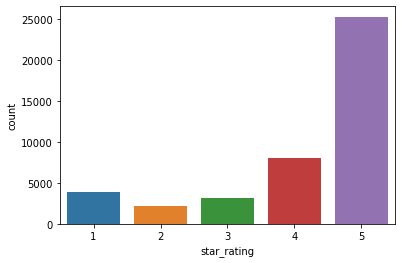

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data = sentdf ,x = 'star_rating')
plt.xlabel('star_rating');




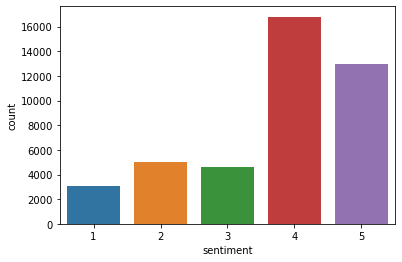

In [100]:
# New

sns.countplot(data = sentdf ,x = 'sentiment')
plt.xlabel('sentiment');

In [106]:
# print(sentdf['star_rating'].corr(sentdf['sentiment']))

sentdf
sentdf['review_body'].iloc[42469]

'Wright summarizes current research on primate evolution from a novel perspective -- he interprets how we *feel* in evolutionary terms -- especially moral feelings such as guilt, righteous anger, etc.  His conclusions are sensible but not profound.  The most important message of the book is simply the &quot;copernican&quot; shift that places evolutionary game theory, rather than our inherited primate emotions, at the center of our moral universe'

In [109]:
import math
y_actual = sentdf['star_rating']
y_predicted = sentdf['sentiment']

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)


Root Mean Square Error:

1.1156569229259998


In [113]:
# for each discipline

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

def r2_rmse( g ):
    r2 = r2_score( g['star_rating'], g['sentiment'] )
    rmse = np.sqrt( mean_squared_error( g['star_rating'], g['sentiment'] ) )
    return pd.Series( dict(  r2 = r2, rmse = rmse ) )

sentdf.groupby('discipline').apply( r2_rmse ).reset_index()

,discipline,r2,rmse
0,anthropology,0.274383,1.015928
1,economy,0.311654,1.082664
2,politics,0.177057,1.200858
3,psychology,0.278635,1.001629
4,sociology,0.293318,1.077675


In [114]:
# for each discipline

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

def r2_rmse( g ):
    MSE = np.square(np.subtract(g['star_rating'], g['sentiment'])).mean() 
    rmse = np.sqrt( mean_squared_error( g['star_rating'], g['sentiment'] ) )
    return pd.Series( dict(  MSE = MSE, rmse = rmse ) )

sentdf.groupby('discipline').apply( r2_rmse ).reset_index()

,discipline,MSE,rmse
0,anthropology,1.032110,1.015928
1,economy,1.172162,1.082664
2,politics,1.442060,1.200858
3,psychology,1.003261,1.001629
4,sociology,1.161383,1.077675
